# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

279

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# create a dictionary to hold target info from API
city_info = {"City":[], "Lat":[], "Lng":[], "Max Temp": [], "Humidity": [],
             "Cloudiness":[], "Wind Speed": [], "Country":[], "Date": []}
 
# keep track of API request
x, i = 1, 1

# gather data
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
    try:
        response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_api_key}").json()
        if city not in city_info:
            city_info["City"].append(response["name"])
            city_info["Lat"].append(response["coord"]["lat"])
            city_info["Lng"].append(response["coord"]["lon"])
            city_info["Max Temp"].append(response["main"]["temp_max"])
            city_info["Humidity"].append(response["main"]["humidity"])
            city_info["Cloudiness"].append(response["clouds"]["all"])
            city_info["Wind Speed"].append(response["wind"]["speed"])
            city_info["Country"].append(response["sys"]["country"])
            city_info["Date"].append(response["dt"])
            print(f"Processing Record {x} of Set {i} | {city}")
    except KeyError:
        print("Oops, there's no data for",city,".")
    x += 1
    if x > 50:
        x = 1
        i += 1

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | havre
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | abadan
Processing Record 6 of Set 1 | muli
Processing Record 7 of Set 1 | mecca
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | oparino
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | campoverde
Processing Record 14 of Set 1 | tahoua
Oops, there's no data for kuche .
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | nizwa
Processing Record 20 of Set 1 | san rafael
Processing Record 21 of Set 1 | lodja
Processing Record 22 of Set 1 | souillac
Processing Record 23 of Set 1 | kichera
Processing Record 24 of Set 1 | albany
Pr

Processing Record 2 of Set 5 | budogoshch
Oops, there's no data for chikoy .
Processing Record 4 of Set 5 | araouane
Oops, there's no data for tilsonburg .
Processing Record 6 of Set 5 | zhanaozen
Oops, there's no data for palabuhanratu .
Processing Record 8 of Set 5 | isangel
Processing Record 9 of Set 5 | kenora
Processing Record 10 of Set 5 | belmonte
Processing Record 11 of Set 5 | bojnurd
Processing Record 12 of Set 5 | caiaponia
Processing Record 13 of Set 5 | cam ranh
Processing Record 14 of Set 5 | cape town
Processing Record 15 of Set 5 | saint-augustin
Oops, there's no data for taburi .
Processing Record 17 of Set 5 | salalah
Processing Record 18 of Set 5 | ribeira grande
Processing Record 19 of Set 5 | fare
Oops, there's no data for ye .
Processing Record 21 of Set 5 | chiclana
Processing Record 22 of Set 5 | svetlyy
Processing Record 23 of Set 5 | menongue
Oops, there's no data for belushya guba .
Processing Record 25 of Set 5 | port blair
Processing Record 26 of Set 5 | po

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# create df
city_data = pd.DataFrame(city_info)

#display(city_data)

# export to csv
city_data.to_csv("city_data.csv")

In [11]:
# display df
print(city_data)

                        City      Lat       Lng  Max Temp  Humidity  \
0               Punta Arenas -53.1500  -70.9167     42.91        81   
1    Arrondissement du Havre  49.5833    0.3333     51.44        92   
2                      Bluff -46.6000  168.3333     55.54        85   
3                    Ushuaia -54.8000  -68.3000     31.12        88   
4                     Ābādān  30.3392   48.3043     80.55        22   
..                       ...      ...       ...       ...       ...   
246               Carinhanha -14.3047  -43.7650     71.98        70   
247                   Pandan  14.0453  124.1694     82.22        82   
248                 Mananara -16.1667   49.7667     77.72        71   
249                   Kaduna  10.5222    7.4383     76.95        69   
250             Río Gallegos -51.6226  -69.2181     39.25        70   

     Cloudiness  Wind Speed Country        Date  
0            40       17.27      CL  1635316357  
1           100        9.80      FR  1635316358

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
clean_df = city_data.drop(columns=["City", "Country"])
#print(clean_df)

Hum_100 = {}

# create summary table where humidity is less than 100%
for column in clean_df.columns:
    Hum_100[column] = [clean_df[column].count(),
                         clean_df[column].mean(),
                         clean_df[column].std(),
                         clean_df[column].min(),
                         clean_df[column].quantile(.25),
                         clean_df[column].quantile(.50),
                         clean_df[column].quantile(.75),
                         clean_df[column].max()]
H100_df = pd.DataFrame(Hum_100)
index_names = {0:'count', 1:'mean', 2:'std', 3:'min', 4:'25%', 5:'50%', 6:'75%', 7:'max'}
H100_df = H100_df.rename(index=index_names)
H100_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,18.641178,17.735354,59.523147,71.916335,58.378486,7.700319,1.635316e+09
std,35.610900,94.085341,22.702885,19.798307,40.803384,5.521548,8.993010e+01
min,-54.800000,-175.200000,-18.110000,12.000000,0.000000,0.000000,1.635315e+09
25%,-9.406100,-66.402550,45.185000,63.000000,12.000000,3.970000,1.635316e+09
50%,22.075200,23.433300,63.840000,76.000000,75.000000,6.350000,1.635316e+09
75%,49.400000,102.272600,78.435000,85.000000,100.000000,10.260000,1.635316e+09
max,78.218600,179.316700,93.790000,100.000000,100.000000,33.200000,1.635316e+09


In [13]:
#  Get the indices of cities that have humidity over 100%.
humidity = clean_df[clean_df["Humidity"] >= 100]
humidity.index

Int64Index([31, 82, 153], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = clean_df.drop(humidity.index)
clean_city_data

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,-53.1500,-70.9167,42.91,81,40,17.27,1635316357
1,49.5833,0.3333,51.44,92,100,9.80,1635316358
2,-46.6000,168.3333,55.54,85,48,7.78,1635316358
3,-54.8000,-68.3000,31.12,88,100,6.46,1635316254
4,30.3392,48.3043,80.55,22,0,4.61,1635316359
...,...,...,...,...,...,...,...
246,-14.3047,-43.7650,71.98,70,4,7.83,1635316469
247,14.0453,124.1694,82.22,82,34,11.18,1635316469
248,-16.1667,49.7667,77.72,71,79,6.29,1635316470
249,10.5222,7.4383,76.95,69,96,0.87,1635316470


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

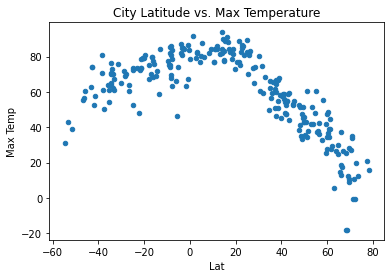

In [15]:
scatter1 = clean_city_data.plot.scatter(x='Lat',
                    y='Max Temp',
                    title = "City Latitude vs. Max Temperature")

## Latitude vs. Humidity Plot

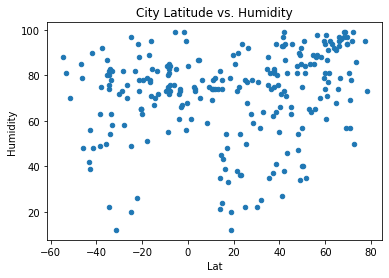

In [16]:
scatter2 = clean_city_data.plot.scatter(x='Lat',
                    y='Humidity',
                    title = "City Latitude vs. Humidity")

## Latitude vs. Cloudiness Plot

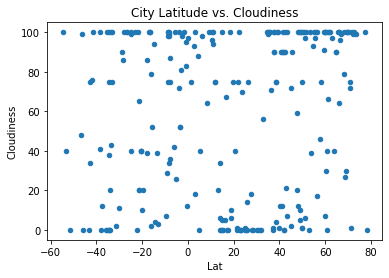

In [17]:
scatter3 = clean_city_data.plot.scatter(x='Lat',
                    y='Cloudiness',
                    title = "City Latitude vs. Cloudiness")

## Latitude vs. Wind Speed Plot

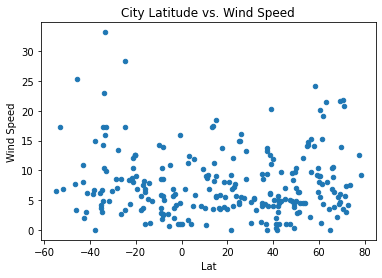

In [18]:
scatter3 = clean_city_data.plot.scatter(x='Lat',
                    y='Wind Speed',
                    title = "City Latitude vs. Wind Speed")

## Linear Regression

In [19]:
nh_weather = clean_city_data[clean_city_data["Lat"] > 0]
sh_weather = clean_city_data[clean_city_data["Lat"] < 0]
#nh_weather.describe()
#sh_weather.describe()

In [20]:
print(nh_weather)

         Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed        Date
1    49.5833    0.3333     51.44        92         100        9.80  1635316358
4    30.3392   48.3043     80.55        22           0        4.61  1635316359
5     2.9167   73.5667     81.82        74         100       11.30  1635316359
6    21.4267   39.8261     88.90        38           0        9.15  1635316359
8    59.8518   48.2783     34.29        94         100        8.01  1635316360
..       ...       ...       ...       ...         ...         ...         ...
242  61.2056   26.0381     44.69        91          66        7.67  1635316467
243  55.3603   54.6153     37.09        65          97       14.81  1635316467
245  23.1990   74.4507     86.25        36           0        7.63  1635316468
247  14.0453  124.1694     82.22        82          34       11.18  1635316469
249  10.5222    7.4383     76.95        69          96        0.87  1635316470

[160 rows x 7 columns]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
north_weather = nh_weather.rename(columns={"Lat":"Latitude", "Lng":"Longitude", "Max Temp":"Max_Temperature", "Humidity":"Humidity", "Cloudiness":"Cloudiness", "Wind Speed":"Wind_Speed"})

south_weather = sh_weather.rename(columns={"Lat":"Latitude", "Lng":"Longitude", "Max Temp":"Max_Temperature", "Humidity":"Humidity", "Cloudiness":"Cloudiness", "Wind Speed":"Wind_Speed"})

-0.9172030691023021


Text(0, 0, 'y=81.77+-0.76*x')

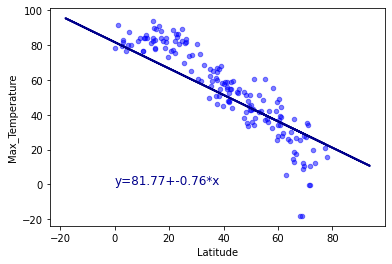

In [22]:
r = north_weather.corr(method='pearson', min_periods=1)
print(r['Max_Temperature']['Latitude'])
temp_fit = np.polyfit(north_weather.Max_Temperature, north_weather.Latitude, 1)
lr_scatter1 = north_weather.plot.scatter(x='Latitude', y='Max_Temperature', color='blue', alpha=0.5)
plt.plot(north_weather.Max_Temperature, temp_fit[0] * north_weather.Max_Temperature + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(0, 0, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.6195704806232617


Text(-40, -40, 'y=-77.53+0.78*x')

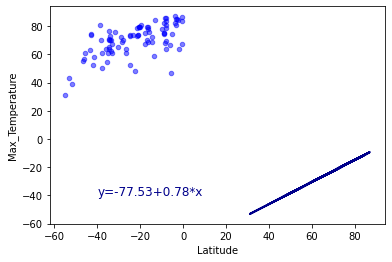

In [23]:
r = south_weather.corr(method='pearson', min_periods=1)
print(r['Max_Temperature']['Latitude'])
temp_fit = np.polyfit(south_weather.Max_Temperature, south_weather.Latitude, 1)
south_weather.plot.scatter(x='Latitude', y='Max_Temperature', color='blue', alpha=0.5)
plt.plot(south_weather.Max_Temperature, temp_fit[0] * south_weather.Max_Temperature + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(-40, -40, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.3579013033627116


Text(15, 5, 'y=15.30+0.35*x')

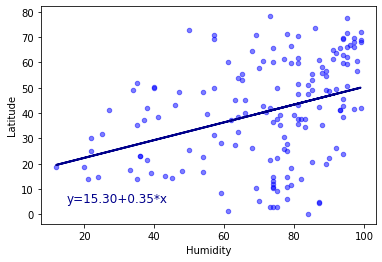

In [28]:
r = north_weather.corr(method='pearson', min_periods=1)
print(r['Humidity']['Latitude'])
temp_fit = np.polyfit(north_weather.Humidity, north_weather.Latitude, 1)
north_weather.plot.scatter(x='Humidity', y='Latitude', color='blue', alpha=0.5)
plt.plot(north_weather.Humidity, temp_fit[0] * north_weather.Humidity + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(15, 5, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.2103393159328117


Text(15, -50, 'y=-35.03+0.17*x')

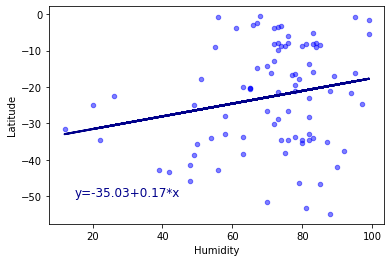

In [34]:
r = south_weather.corr(method='pearson', min_periods=1)
print(r['Humidity']['Latitude'])
temp_fit = np.polyfit(south_weather.Humidity, south_weather.Latitude, 1)
south_weather.plot.scatter(x='Humidity', y='Latitude', color='blue', alpha=0.5)
plt.plot(south_weather.Humidity, temp_fit[0] * south_weather.Humidity + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(15, -50, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.2644779361772572


Text(0, 0, 'y=33.04+0.13*x')

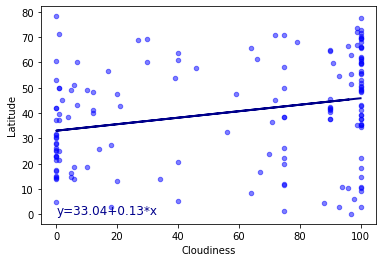

In [36]:
r = north_weather.corr(method='pearson', min_periods=1)
print(r['Cloudiness']['Latitude'])
temp_fit = np.polyfit(north_weather.Cloudiness, north_weather.Latitude, 1)
north_weather.plot.scatter(x='Cloudiness', y='Latitude', color='blue', alpha=0.5)
plt.plot(north_weather.Cloudiness, temp_fit[0] * north_weather.Cloudiness + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(0, 0, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.20621708837076513


Text(0, -50, 'y=-27.06+0.08*x')

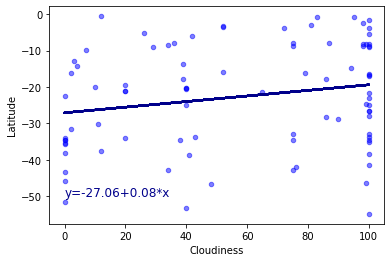

In [41]:
r = south_weather.corr(method='pearson', min_periods=1)
print(r['Cloudiness']['Latitude'])
temp_fit = np.polyfit(south_weather.Cloudiness, south_weather.Latitude, 1)
south_weather.plot.scatter(x='Cloudiness', y='Latitude', color='blue', alpha=0.5)
plt.plot(south_weather.Cloudiness, temp_fit[0] * south_weather.Cloudiness + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(0, -50, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.12300554613943214


Text(0, 0, 'y=36.82+0.49*x')

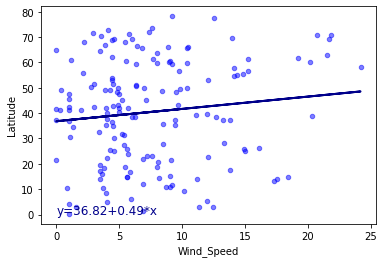

In [43]:
r = north_weather.corr(method='pearson', min_periods=1)
print(r['Wind_Speed']['Latitude'])
temp_fit = np.polyfit(north_weather.Wind_Speed, north_weather.Latitude, 1)
north_weather.plot.scatter(x='Wind_Speed', y='Latitude', color='blue', alpha=0.5)
plt.plot(north_weather.Wind_Speed, temp_fit[0] * north_weather.Wind_Speed + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(0, 0, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.27368777907173614


Text(0, -50, 'y=-17.43+-0.64*x')

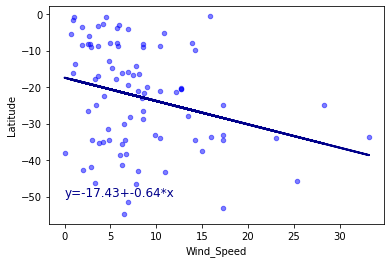

In [44]:
r = south_weather.corr(method='pearson', min_periods=1)
print(r['Wind_Speed']['Latitude'])
temp_fit = np.polyfit(south_weather.Wind_Speed, south_weather.Latitude, 1)
south_weather.plot.scatter(x='Wind_Speed', y='Latitude', color='blue', alpha=0.5)
plt.plot(south_weather.Wind_Speed, temp_fit[0] * south_weather.Wind_Speed + temp_fit[1], color = 'darkblue', linewidth = 2)
plt.text(0, -50, 'y={:.2f}+{:.2f}*x'.format(temp_fit[1], temp_fit[0]), color='darkblue', size=12)
